In [63]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pd.read_csv("drive/MyDrive/portofolio/laptops.csv")

In [66]:
# # Memeriksa 5 baris pertama
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [67]:
# Memeriksa 5 baris terakhir
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [68]:
# Memeriksa jumlah baris dan kolom
df.shape

(2160, 12)

In [69]:
# Memeriksa produk baris dan kolom
df.size

25920

In [70]:
# Memeriksa nama kolom
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [71]:
# Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [72]:
# Ringkasan statistikal
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Data Cleaning

In [73]:
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


In [74]:
df.drop(['GPU'], axis=1, inplace=True)

In [75]:
df.dropna(inplace=True)

In [76]:
df.duplicated().value_counts()

,count
False,2114


# Data Visualization

In [77]:
# Memeriksa nilai unik
df.nunique()

,0
Laptop,2114
Status,2
Brand,27
Model,119
CPU,27
RAM,9
Storage,11
Storage type,2
Screen,28
Touch,2


<function matplotlib.pyplot.show(close=None, block=None)>

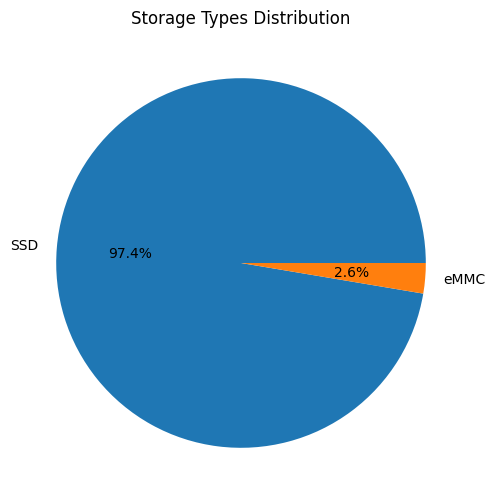

In [78]:
# 'Storage types' kolom - pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Storage type'].value_counts(), labels=df['Storage type'].value_counts().index, autopct='%1.1f%%')
plt.title('Storage Types Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

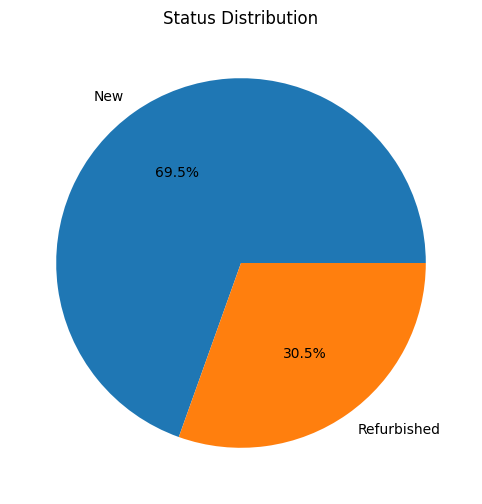

In [79]:
# 'Status' kolom - Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Status Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

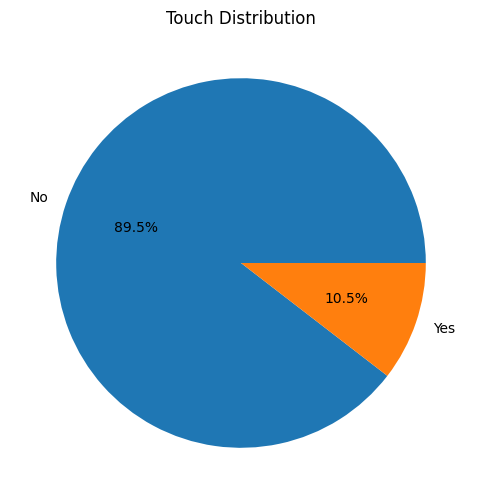

In [80]:
# 'Touch' kolom - pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Touch'].value_counts(), labels=df['Touch'].value_counts().index, autopct='%1.1f%%')
plt.title('Touch Distribution')
plt.show

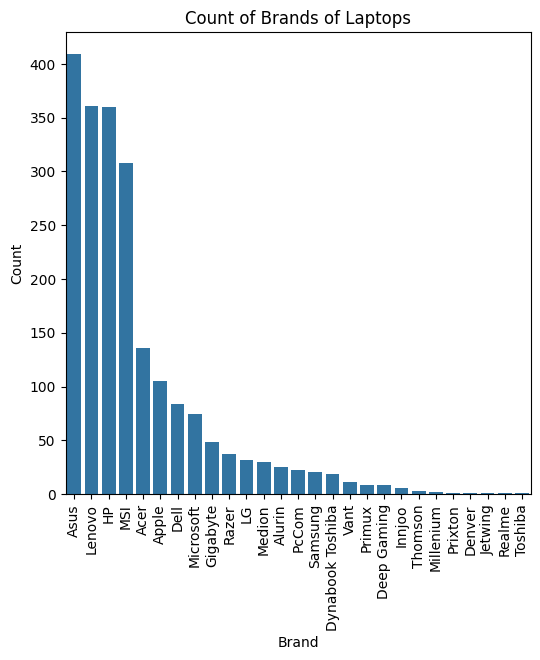

In [81]:
# 'Brand' kolom - Pie Chart
plt.figure(figsize=(6, 6))
touch_counts = df['Brand'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Brands of Laptops')
plt.show()

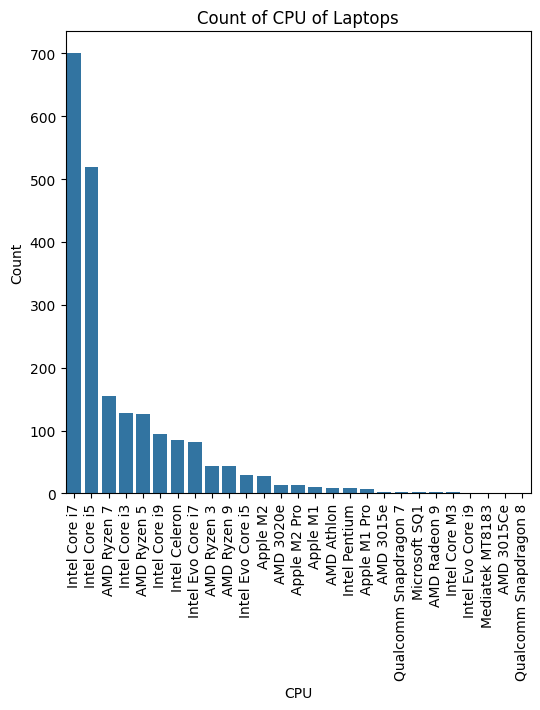

In [82]:
# 'CPU' kolom - Bar Plot
plt.figure(figsize=(6, 6))
touch_counts = df['CPU'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('CPU')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of CPU of Laptops')
plt.show()

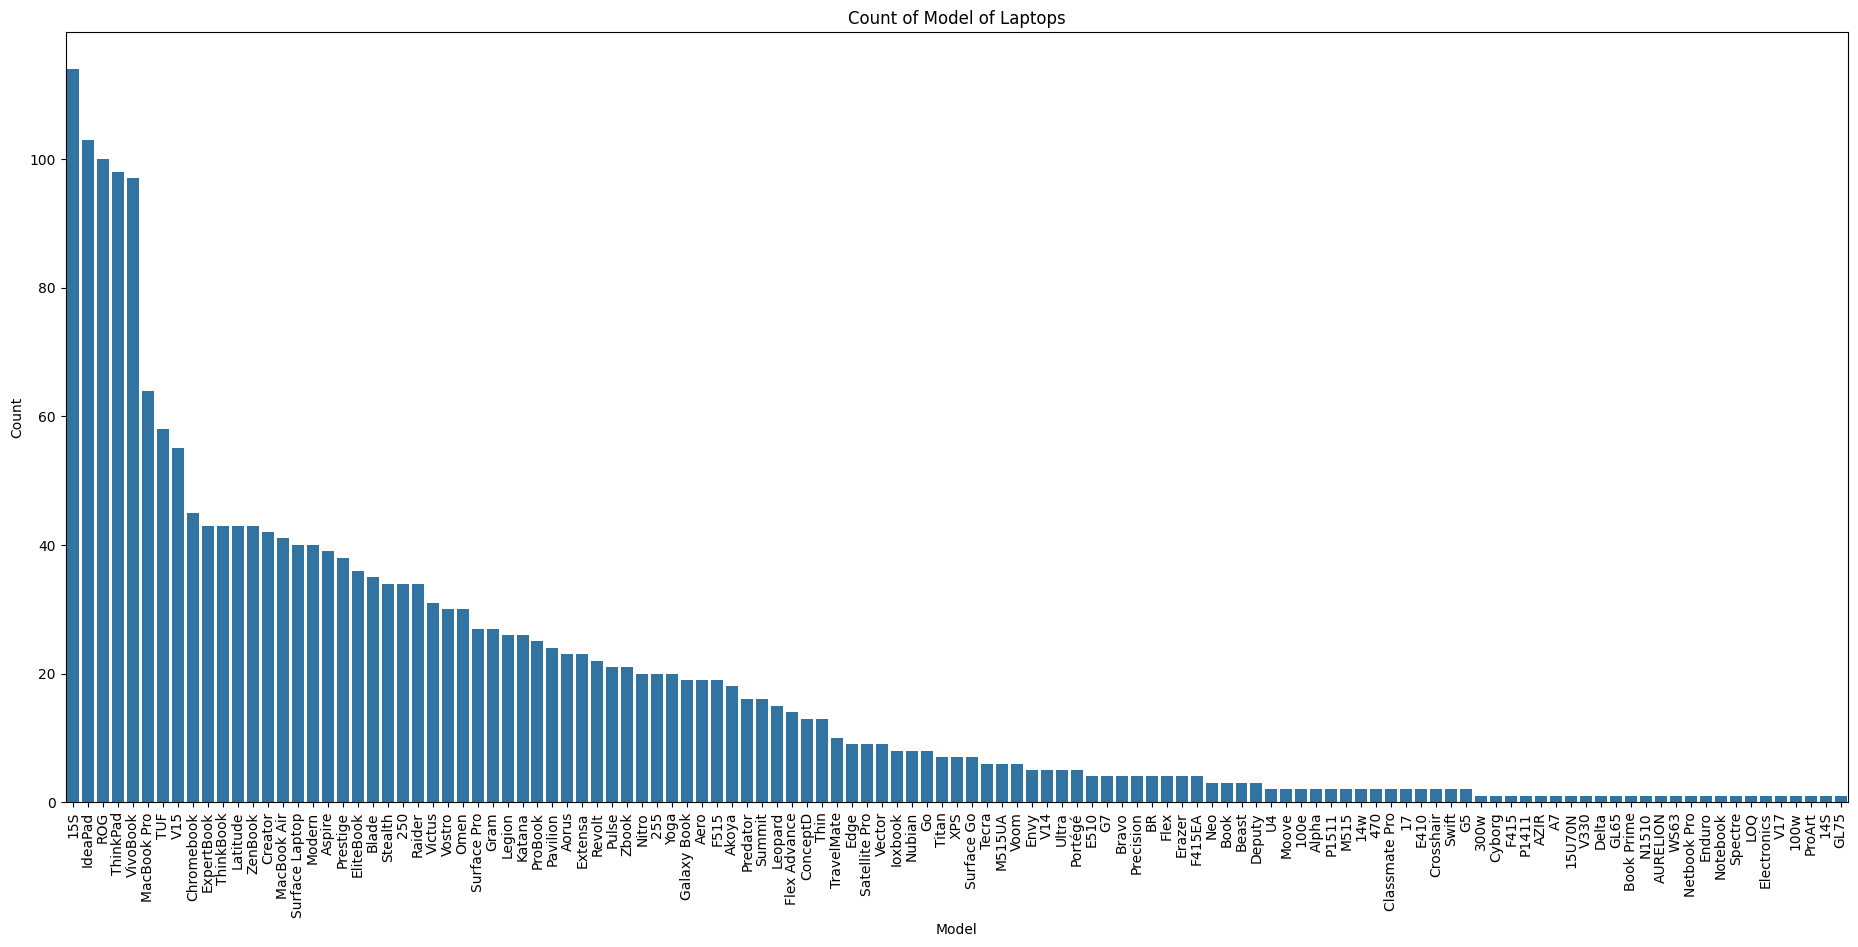

In [83]:
# 'Model' kolom - Bar Plot
plt.figure(figsize=(23, 10))
touch_counts = df['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Model of Laptops')
plt.show()

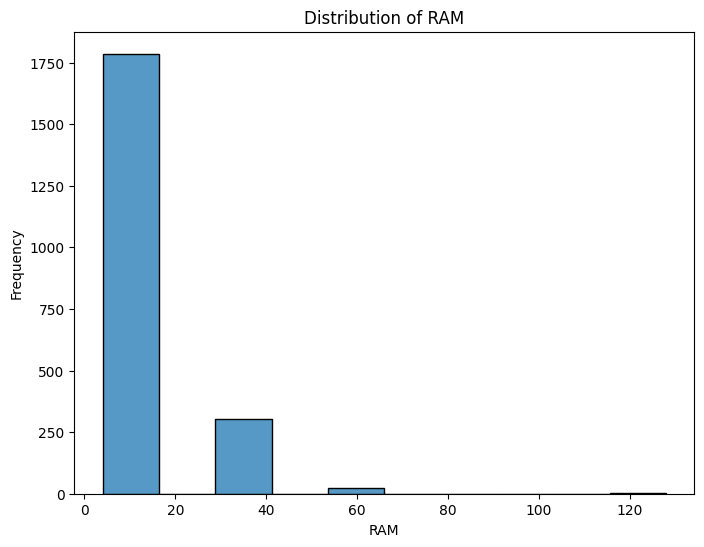

In [84]:
# 'RAM' kolom - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['RAM'], bins=10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')
plt.show()

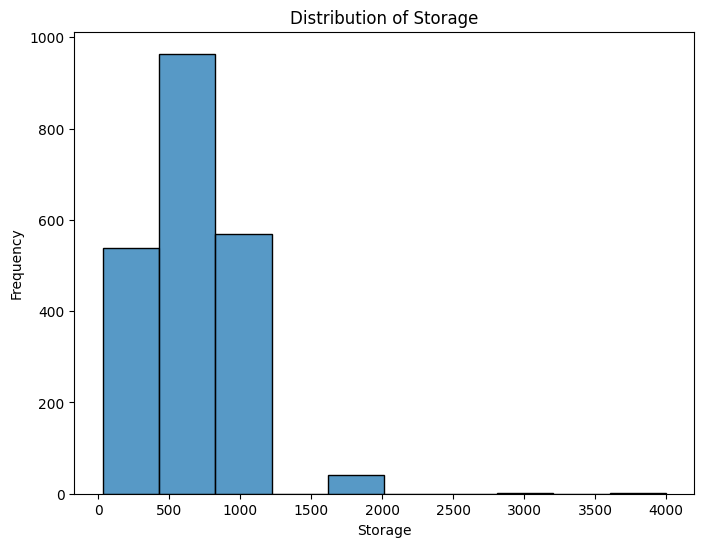

In [85]:
# 'Storage' Kolom - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Storage'], bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Distribution of Storage')
plt.show()

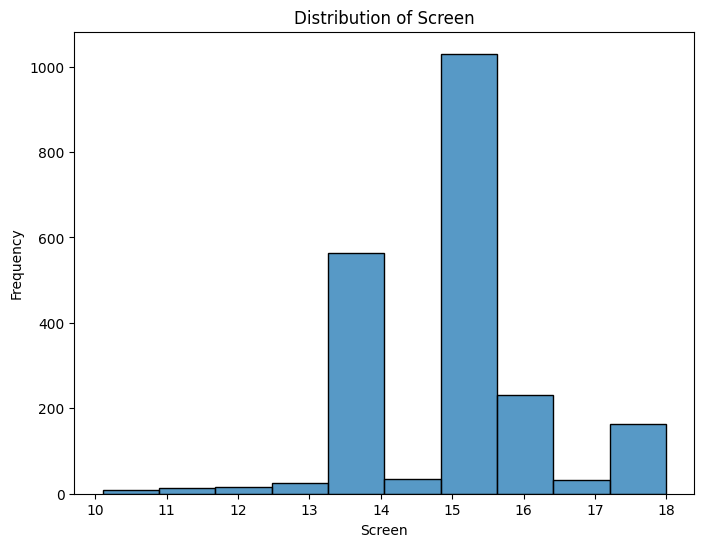

In [86]:
# 'Screen' Kolom Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Screen'], bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

# Feature Engineering

In [87]:
# Label encoding
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage'])

# Correlation Analysis

In [88]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

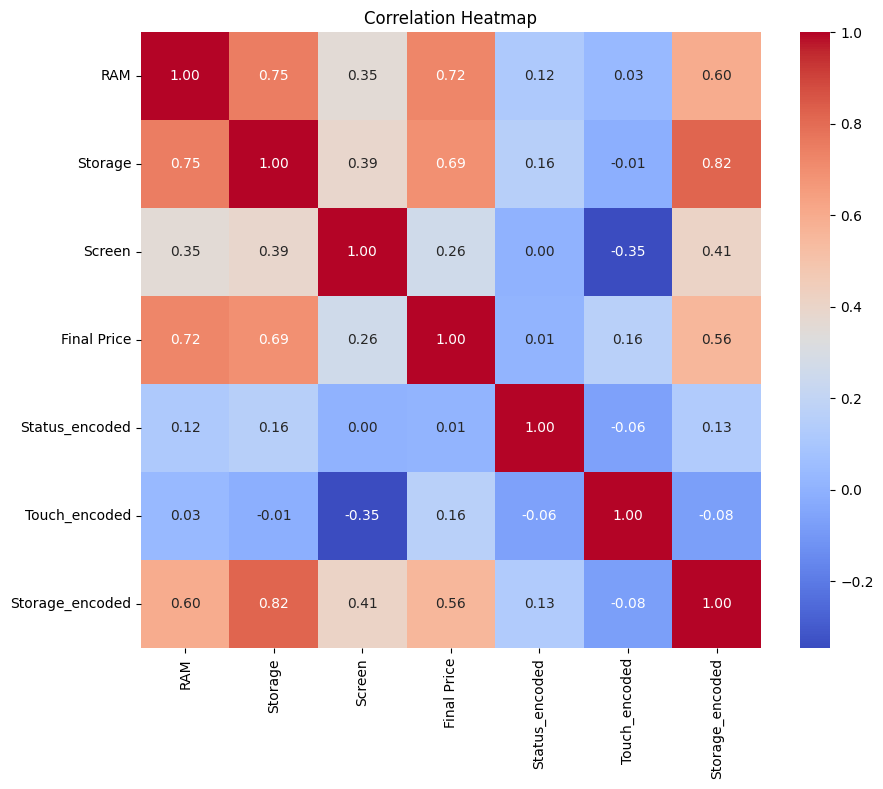

In [89]:
# Membuat Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Modeling

In [90]:
x = df[['RAM', 'Storage', 'Screen', 'Status_encoded', 'Storage_encoded', 'Touch_encoded']]
y = df['Final Price']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

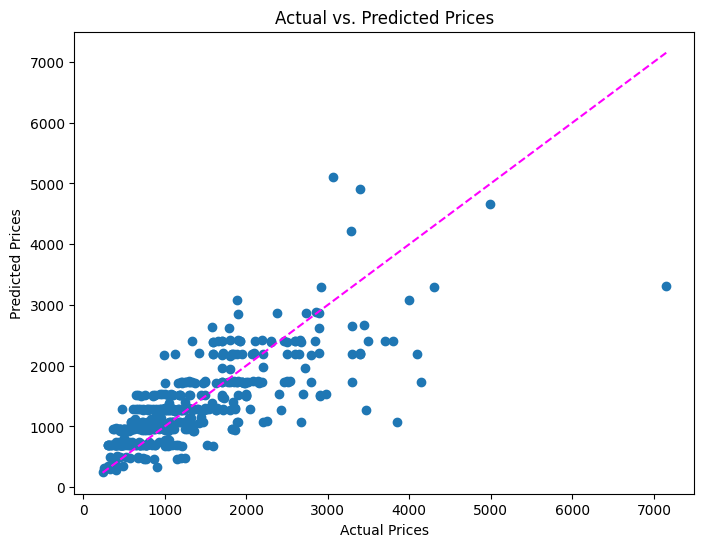

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='magenta', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Model Evaluation

In [100]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [101]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 323907.8222581497
R-squared (R2): 0.5829651052185103
Mean Absolute Error (MAE): 401.2464314326053
Root Mean Squared Error (RMSE): 569.1290031777942


# Model Interpolation

In [102]:
coeficients = model.coef_
intercept = model.intercept_
print("Koefisien:", coeficients)
print("Intersep:", intercept)

Koefisien: [  42.22048736    0.87394646    8.52197581 -209.91432027   14.14436066
  454.79417596]
Intersep: -49.87687402185679


# Prediksi Harga Menggunakan Data Baru

In [103]:
new_laptop = np.array([[8, 256, 15.6, 0, 1, 1]])
predicted_price = model.predict(new_laptop)
print("Prediksi Harga Laptop:", predicted_price)

Prediksi Harga Laptop: [1113.49867736]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
new_laptop = np.array([[8, 256, 15.6, 0, 0, 0]])
predicted_price = model.predict(new_laptop)
print("Prediksi Harga Laptop:", predicted_price)

Prediksi Harga Laptop: [644.56014074]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
new_laptop = np.array([8, 256, 15.6, 1, 1, 1]).reshape(1, -1) # Reshape to a 2D array with one row and multiple columns
predicted_price = model.predict(new_laptop)
print("Prediksi Harga Laptop:", predicted_price)

Prediksi Harga Laptop: [903.5843571]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
